# Prosper Loans Data Exploration
##  Preliminary Wrangling



In [91]:
import pandas as pd
import numpy as np

#importing Visualization modules
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import yeojohnson


#To Visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')
import warnings
warnings.simplefilter("ignore")

In [92]:
# Loading the dataset 
# Importing The dataset
df_loan = pd.read_csv("C:\\Users\hp\\Downloads\\prosperLoanData (1).csv", 
                      parse_dates= ['ListingCreationDate', 'DateCreditPulled','FirstRecordedCreditLine','ClosedDate'])

In [93]:
df_loan.shape

(113937, 81)

In [94]:
df_loan.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
53782,FD5E3414959118716B76FE4,292511,2008-03-12 18:13:57.613,AA,36,Completed,2009-12-02,0.07516,0.0695,0.0695,NaN,NaN,NaN,NaN,NaN,NaN,1,TX,Analyst,Full-time,11.0,False,False,NaN,2008-03-12 18:04:01.680,760.0,779.0,1999-11-05,5.0,2.0,15.0,2,15.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3236.0,0.14,19264.0,8.0,1.00,0.0,0.04,"$25,000-49,999",True,3750.000000,BFB63415605506530DC4DF9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,72,28727,3000,2008-03-21 00:00:00,Q1 2008,C2A53415236730651836AC3,92.56,3248.2000,3000.00,248.2000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,108
89883,C24E3386044456214337E87,117077,2007-03-29 17:54:59.903,A,36,Completed,2007-06-01,0.14166,0.1346,0.1271,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Other,Full-time,24.0,True,True,223133764057631067F3FD8,2007-03-28 08:25:23.313,720.0,739.0,1973-07-01,19.0,16.0,39.0,17,678.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,29158.0,0.59,19704.0,36.0,0.83,0.0,0.48,"$25,000-49,999",True,2888.833333,B5BA3387123155115B8FA62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,83,12899,15000,2007-04-17 00:00:00,Q2 2007,E0C6338394276030170B46E,508.74,15242.4300,15000.00,242.4300,-9.17,0.0,0.0,0.0,0.0,1.0,0,0,0.0,220
39131,453235810609395881620E2,797890,2013-06-05 00:40:04.443,NaN,36,Current,NaT,0.25013,0.2124,0.2024,0.18730,0.0874,0.09990,4.0,C,5.0,1,CA,Construction,Employed,97.0,False,False,NaN,2013-06-05 00:39:55.000,660.0,679.0,1996-12-03,8.0,8.0,27.0,7,212.0,1.0,5.0,0.0,0.0,14.0,1.0,0.0,5655.0,0.40,7101.0,23.0,0.56,1.0,0.26,"$50,000-74,999",True,5833.333333,24A33685872573365A7136D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,9,93469,20000,2013-06-19 00:00:00,Q2 2013,D1293580262589151AED65B,755.97,8106.1216,5651.19,2454.9316,-116.12,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
57969,09743599778530121DCF6B8,1139106,2014-01-15 03:46:31.313,NaN,36,Current,NaT,0.15223,0.1239,0.1139,0.10900,0.0399,0.06910,6.0,A,6.0,1,RI,Teacher,Employed,112.0,True,False,NaN,2014-01-15 03:46:34.000,680.0,699.0,1989-02-10,15.0,14.0,48.0,13,766.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,45279.0,0.57,32774.0,48.0,0.97,1.0,0.23,"$75,000-99,999",True,6500.000000,22F537038938936450F94BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,128262,20000,2014-01-27 00:00:00,Q1 2014,3C8C3703917735720D5B854,668.02,668.0200,457.56,210.4600,-16.99,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
50230,42213596343016111792FA9,1088730,2013-12-16 13:56:55.277,NaN,36,Current,NaT,0.17611,0.1400,0.1300,0.12334,0.0499,0.07344,5.0,B,5.0,13,TX,Computer Programmer,Employed,81.0,Fals

In [95]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [96]:
#Creating a copy of the Original DataFrame
df_loan_copy = df_loan.copy()

In [97]:
#casting the Crade type into a category variable
df_loan_copy['CreditGrade'] = df_loan_copy['CreditGrade'].astype('category')
df_loan_copy['ProsperRating (Alpha)'] = df_loan_copy['ProsperRating (Alpha)'].astype('category')
df_loan_copy['LoanStatus'] = df_loan_copy['LoanStatus'].astype('category')


In [98]:
df_loan_copy.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [99]:
#setting maximum rows and columns
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 500)


In [100]:
df_loan_copy.columns = df_loan_copy.columns.str.replace(' ', '_')

In [101]:
df_loan_copy.sample(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating_(numeric),ProsperRating_(Alpha),ProsperScore,ListingCategory_(numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent_(percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
57225,DC023372715103405335C7C,54162,2006-10-27 17:44:36.023,B,36,Completed,2008-07-22,0.12700,0.12,0.115,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Computer Programmer,Not available,NaN,True,True,CC8D33653247904019A9059,2006-10-27 17:16:29.197,680.0,699.0,1994-02-24,NaN,NaN,29.0,12,302.0,2.0,8.0,2.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12,Not displayed,True,7650.000000,77FD3373422694204BD8B4E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,88,4535,5000,2006-11-08 00:00:00,Q4 2006,3AC93366932901123485FE3,166.07,5766.24,5000.00,766.24,-31.93,0.0,0.00,0.00,0.0,1.0,0,0,0.0,55
37731,12063481437100503A4566C,454474,2010-04-17 12:05:28.067,NaN,36,Chargedoff,2013-02-02,0.18183,0.16,0.150,0.0816,0.065,0.0816,4.0,C,9.0,1,GA,Administrative Assistant,Full-time,66.0,False,False,NaN,2010-04-15 17:09:08.000,660.0,679.0,1999-06-24,20.0,9.0,41.0,11,402.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17513.0,0.81,3519.0,40.0,1.0,1.0,NaN,"$1-24,999",False,1733.333333,C5643586538381532E8F7D7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,523,33.0,46,42126,2000,2010-05-03 00:00:00,Q2 2010,FA6C3470863563756F22EDD,70.31,1968.68,1468.03,500.65,-31.31,0.0,531.97,531.97,0.0,1.0,0,0,0.0,121


In [102]:
quater = []
a = df_loan_copy['LoanOriginationQuarter'].str.split(' ')
for i in range(len(df_loan_copy.LoanOriginationQuarter)):
    quater.append(a[i][0])
    

In [103]:
def format_number1(data_value,idx):
    '''
    This Function takes a list of int or float values with high
    exponential and converts them to string forrmat
    example 1,000,000 to 1M , where 'M' is millon 
    
    '''
    if type(data_value) == list:
        result = []
        for i in data_value:
            if  (i >= 1_000_000.00) & (i < 1_000_000_000.00):
                formatter = '{:.1f}M'.format(i*0.000001)
                result.append(formatter)
            elif (i >= 100_000.00) & (i < 1_000_000.00):
                formatter = '{:.1f}K'.format(i*0.001)
                result.append(formatter)
            elif (i >= 0.00) & (i < 99_000.00):
                formatter = round(i,1)
                result.append(formatter)
                formatter = 0
                result.append(formatter)
        return result

    else:
        if  (data_value >= 1_000_000.00) & (data_value < 1_000_000_000.00):
            formatter = '{:.1f}M'.format(data_value*0.000001)
            return formatter
        elif (data_value >= 100_000.00) & (data_value < 1_000_000.00):
            formatter = '{:.1f}K'.format(data_value*0.001)
            return formatter
        elif (data_value >= 0.00) & (data_value < 99_000.00):
            formatter = round(data_value,1)
            return formatter
        elif data_value == 0:
            formatter = 0
            return formatter
        else: pass
            
    

In [104]:
# Creating a function to avoid repetive coding 

def display_charts2(col_names, binsize, sns_style, mean_position, median_position, 
                   max_position, ticks,scale ):    
    
    '''
    This Fuction takes the variable from a Panda
    series and creates a histogram to univarate analysis
    '''

    sns.set_style(sns_style) #setting style for charts
    fig = plt.figure()
    fig.subplots_adjust(hspace = 0.4, wspace = 0.4) #Adjusting space between plots

    
    fig.set_figheight(10) #setting Figure height
    fig.set_figwidth(8)   #setting Figure width


    for i,v,x,y in zip(col_names,range(4), binsize, ticks):


        bins = np.arange(0,df_loan_copy[i].max()+x, x) # Ajusting the bins 

        ax = fig.add_subplot(2,2,v+1)
        plt.hist(data= df_loan_copy, x= i, bins = bins); #plotting the histogram
        print(y)



        if scale == True: # Optional Variables


            plt.xscale('log'); 
            labels = ['{}'.format(z) for z in y]
            plt.xticks(y, labels);
        else: pass

        plt.title(i);
        plt.axvline(df_loan_copy[i].max(),    # plotting the median line
               color = 'yellow', linestyle = '--', linewidth = 1);



        plt.axvline(df_loan_copy[i].median(),    # plotting the median line
                   color = 'red', linestyle = '--', linewidth = 1);


        plt.axvline(df_loan_copy[i].mean(),    # plotting the mean line
                   color = 'green', linestyle = '--', linewidth = 1);

        plt.text(df_loan_copy[i].mean(),mean_position,'Mean:{:,.1f}'.format(df_loan_copy[i].mean()));


        plt.text(df_loan_copy[i].median(),median_position,'Median:{:,.1f}'.format(df_loan_copy[i].median()));

        plt.text(df_loan_copy[i].max(),max_position,'Max :{:,.1f}'.format(df_loan_copy[i].max()));



# Data Exploration


 
> - This Dataset explores the loans given by the prosper loan agency to their customers from 2008 to 2014

> - There are 80 columns and 113864 rows in the dataset, and most variables are numeric. The data in this dataset are information collected by the Prosper Loan company.

> - Most variables are numeric, but the variables ProsperScore`, `CreditGrade,` and `ProsperRating_(Alpha)` are ordered factor variables with the following levels.
(Best) ---> (worst)

> ProsperScore: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
>CreditGrade : AA, A, B, C, D, E, HR, NC  <br>
>ProsperRating_Alpha: AA, A, B, C, D, E, HR  <br> 
>ProsperRating_Numeric:  1, 2, 3, 4, 5, 6, 7  <br>

> - Applicants can be given a grade with these variables




### What is/are the main feature(s) of interest in your dataset?

> - Every successful business aims to make profit and Grow, The ProsperLoan comapny changed its Loan Grading system from the CreditGrade to Prosper_Rating Grade and Prosper Score system for loan crediblity accessment and risk management

> - The ProsperLoan dataset contains 80 variables, For this analysis our focus the `LP_GrossPrincipalLoss`and `Lenderyeild`

> - I am interested in the impact of the new rating system on the business

> - The prosper loan company changed its rating system. I am interested in its impact on the `LendersYeild` and `LP_GrossPrincipalLoss.`


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 
> I am interested in the loan Grading systems and their impact on the `MonthlyLoanPayment`, and `LP_CustomerPayments.` The Impact of Changing the Loan Grading systems `ProsperScore`, `LoanStatus,` `and CrediitGrade.`




## Univariate Analysis

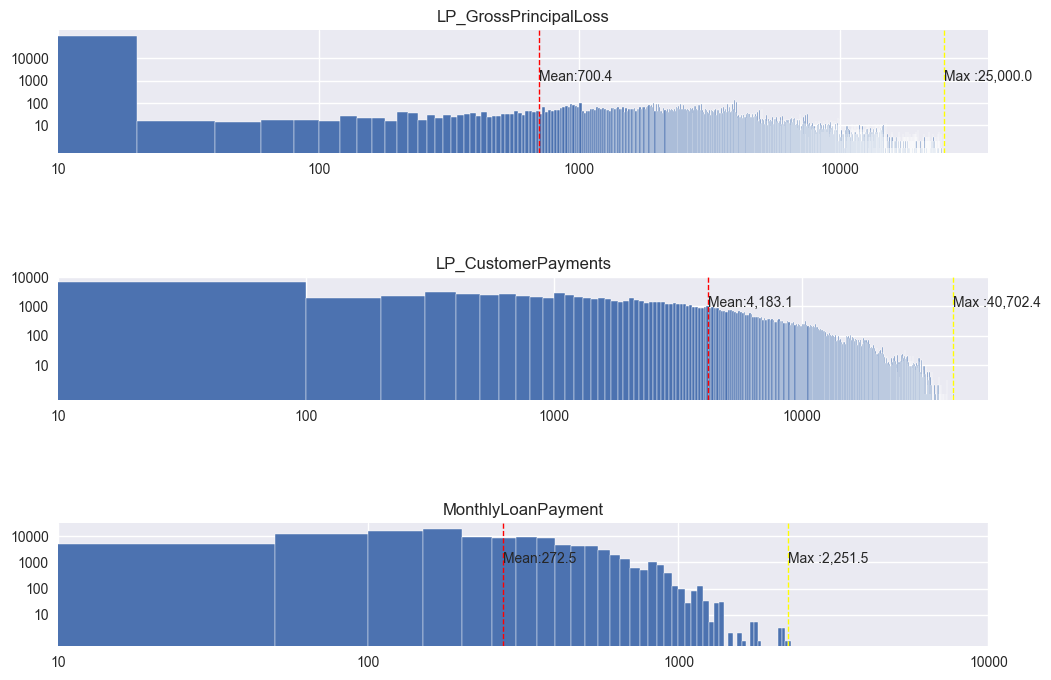

In [105]:
var_list = ['LP_GrossPrincipalLoss','LP_CustomerPayments','MonthlyLoanPayment']
binsize = [20,100,50]


fig = plt.figure(figsize=[12,8]) #figure size
plt.subplots_adjust(hspace= 1)

for j,i,k in zip(var_list,range(len(var_list)),binsize):
    ax = fig.add_subplot(3,1,i+1) #Addin Subplots
    
    bins = (np.arange(0,df_loan_copy[j].max()+1000, k))
    plt.hist(data = df_loan_copy, x = j, bins = bins) 
    ticks = [10,100,1000,10000]
    labels = ['{}'.format(z) for z in ticks]
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(ticks, labels);
    plt.yticks(ticks, labels);
    plt.title(j)
   
    plt.axvline(df_loan_copy[j].max(),    # plotting the median line
                   color = 'yellow', linestyle = '--', linewidth = 1);


#     plt.axvline(df_loan_copy[j].median(),    # plotting the median line
#                color = 'red', linestyle = '--', linewidth = 1);


    plt.axvline(df_loan_copy[j].mean(),    # plotting the mean line
               color = 'red', linestyle = '--', linewidth = 1);

    plt.text(df_loan_copy[j].mean(),1000,'Mean:{:,.1f}'.format(df_loan_copy[j].mean()));


    #plt.text(df_loan_copy[j].median(),100,'Mean:{:,.1f}'.format(df_loan_copy[j].mean()));

    plt.text(df_loan_copy[j].max(),1000,'Max :{:,.1f}'.format(df_loan_copy[j].max()));


> Intrestinly, the shape of the `LP_GrossPrincipalLoss,` `LP_CustomerPayments` and `MonthlyLoanPayment`are very similar, with a majority of the values being within the 0 - 100 range. These variables will likely be highly correlated with one another.

>  `MonthlyLoanpayment` this chart shows a right-skewed unimodal distribution with a maximum median of 16 and a maximum value of  2,215. The monthly loan payment reflects the loan amount as customers request higher loan amounts. They pay a higher monthly MonthlyLoanpayment. The distribution shows a majority of loan payments being under 500 dollars 



Next i am intrested in LenderYield`

> For Loan rates i am intrested in the `LenderYeild` as it is the overall rate for loans to yeild estimates for the lender

> The `LendersYeild` is the estimated return on each loan given to borrowers 

0.1


count    113937.000000
mean          0.182701
std           0.074516
min          -0.010000
25%           0.124200
50%           0.173000
75%           0.240000
max           0.492500
Name: LenderYield, dtype: float64

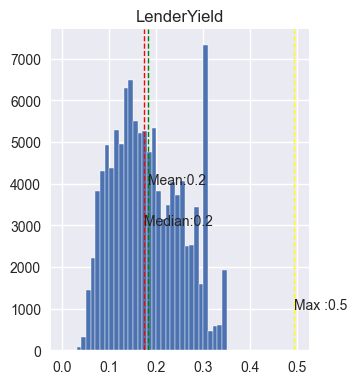

In [106]:
#Using The Display Function
display_charts2(col_names= ['LenderYield'],
              binsize= [0.01],
              sns_style= 'darkgrid',
              mean_position= 4000,
              median_position = 3000,
              max_position = 1000,
              ticks = [0.1,0.2,0.3,0.4,0.5,0.6],
               scale = False
              )
df_loan_copy['LenderYield'].describe()

> These are the rates at which loans are offered to Applicants. They vary across a certain range for different grades of Applicants.

>- `LenderYeild` is normally distributed with a lot of rates at the midpoint 0f 0.2 and the tail end of o.4, with a maximum value of 0.5. The distibution is bimodal

> - It is interesting all the rate variables are similar, `BorrowersAPR` and `LendersYeild` are very similar. There could be a strong correlation between these two variables



Now, we'll take a look into the `LoanGrade` Systems

>What Grade has the highest number of loans issued to borrowers for both credit Grading Systems `CreditGrade` and `Prosperrating` as well the higest `ProsperScore`

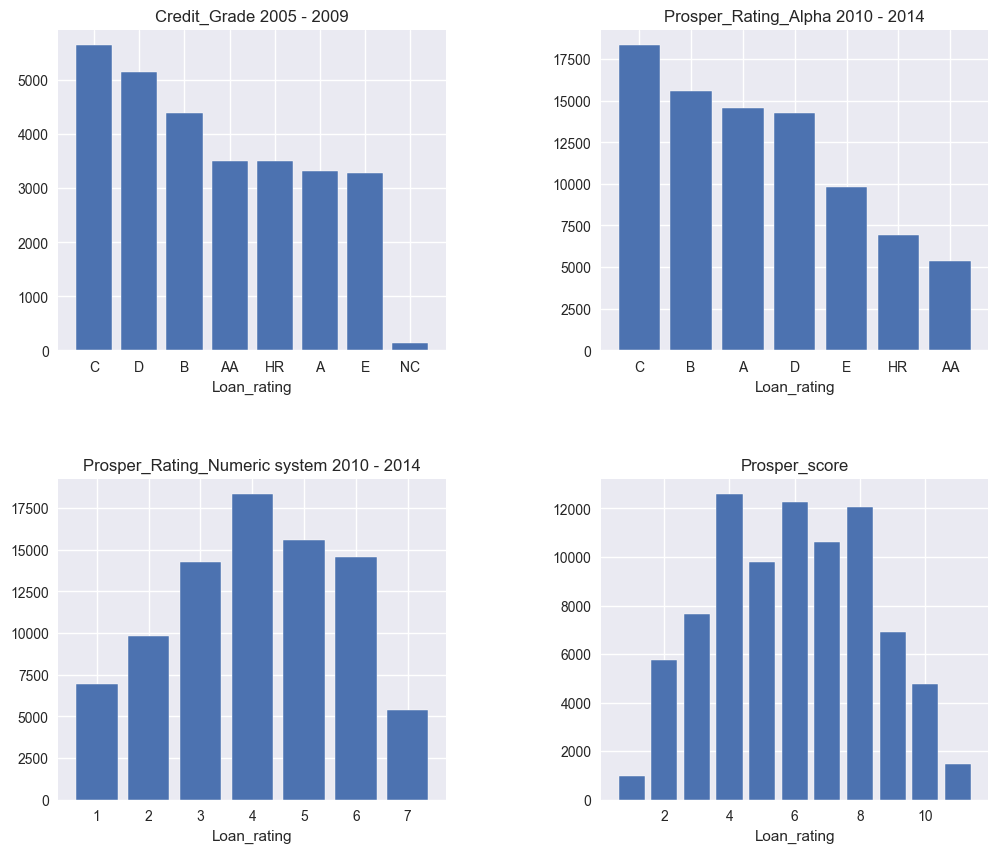

In [107]:
credit_list = ['CreditGrade','ProsperRating_(Alpha)',
                     'ProsperRating_(numeric)','ProsperScore'] 
label  =['Credit_Grade 2005 - 2009','Prosper_Rating_Alpha 2010 - 2014',
        'Prosper_Rating_Numeric system 2010 - 2014','Prosper_score'] 

list_lenght = range(len(credit_list))


fig = plt.figure()
fig.subplots_adjust(hspace = 0.4, wspace = 0.4) #adjusting plots
fig.set_figheight(10)
fig.set_figwidth(12)
    
for i,v,x in zip(credit_list,list_lenght,label):
    credit_grade = pd.DataFrame(df_loan_copy[i].value_counts()).reset_index()
    ax = fig.add_subplot(2,2,v+1) # Fig Subplots
    ax.bar(data= credit_grade, x= 'index',height= i);
    
    
   

    plt.xticks(rotation = 75); 
    ax.set_xlabel('Loan_rating');
    ax.set_title(x);
    plt.xticks(rotation = 0)
    



 > Prosper loan company used two different rating systems, which were used at two other times the `CreditGrade` from 2006 to 2009 and the `Prosper_Rating_System` from 2010 to 2014
 
 > The `prosper_rating_system` has two components, the Numeric (`ProsperRating_(Numeric)`) and Alphabetical (`ProsperRating_(Alpha)`), with each having a corresponding value. Further analysis of the prosper loan grading system indicates a numeric counterpart for each category, with the highest rated being class "A" and the lowest being  class "E."  
 
 > The `ProsperRating_(Alpha)` shows a 'C' grade with a rating of 4  one, the `ProsperRating_(Numeric)` and AA having the lowest frequency with a rating of 7
 
 > The Chart above indicates 'C' `CreditScore` being the most frequent, with a majority of applicants being in Grade 'C' credit score with the CreditGrade system for 2006 - 2009 
 
> The Chart above indicates 'C' creditscore being the most frequent with majority of applicants being in Grade 'C' credit score with the `CreditGrade` system for 2006 - 2009 

> The `ProsperScore` indicates the amount of risk of default for each loan Applicant, with ten being the least risky and 0 being the riskiest. The `ProperScore` suggests a score of 4 being the most frequent



> `ProsperScore` charts shows values with the score of some borrowers to be at 11, the maximum possible score for for customers is 10 and a minimum value of 1



In [108]:
#Filtering properscore greater than 10
a = df_loan_copy['ProsperScore'] > 10

a = df_loan_copy[a].index #getting the index from the filter

df_loan_copy['ProsperScore'].iloc[a] = 10


Now i will analyze borrowers LoanStatus

> What is the current composition of status of the loans issued

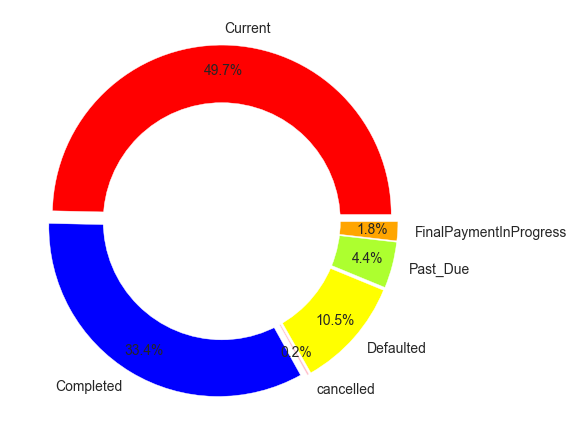

,Loan_Status,Count
0,Current,56576
1,Completed,38074
2,Chargedoff,11992
3,Defaulted,5018
4,Past Due (1-15 days),806
5,Past Due (31-60 days),363
6,Past Due (61-90 days),313
7,Past Due (91-120 days),304
8,Past Due (16-30 days),265
9,FinalPaymentInProgress,205


In [109]:
# pie chartemployment loan status
df_loan_copy['LoanStatus'].value_counts()
sizes = [56576,38074,205,11992,5018,2067] #pie Sizes
labels = ['Current', 'Completed', 'cancelled','Defaulted','Past_Due','FinalPaymentInProgress'] #pie labels
colors = ['#FF0000', '#0000FF','#FFC0CB',"#FFFF00", '#ADFF2F','#FFA500'] #pie colors
explode = (0.04, 0.04,0.04,0.04,0.04,0.04)

#pie chart
plt.pie(sizes, colors=colors, labels= labels,autopct='%1.1f%%', pctdistance=0.85, explode= explode)

# Adding a Centre circle
center_circle = plt.Circle((0,0), 0.70, fc='White') 
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#displaying charts
plt.show()

pd.DataFrame(df_loan_copy['LoanStatus'].value_counts()).reset_index().rename( # Creating Dataframe
    columns= {'index': 'Loan_Status', 'LoanStatus': 'Count'})


For The Chart Above i Grouped the loans pasted their due date into one section `Past_due`for easy anaylsis

 
> The Chart above indicates the percentage of each loan_status category, From the chart above the **50%** of loans are still being `Current` and **33%** of loans are `completed` with **10.5%** of total loans being `defaulted` on and **4.4%** of loans payments passing their due date for the next payment
> After Changing the Grading system, Grade C still seems to be the grade with the highest Frequency



I'll now look at the other features in the data to see if any of them hold interesting properties.

> What is the highest Year over Year Growth on the Platform, from 2006 to 2013  


In [110]:
#Creating a Day, Month, and year column for easy analysis

df_loan_copy['Year'] = df_loan_copy.ListingCreationDate.dt.year #creating a year column

df_loan_copy['Month'] = df_loan_copy.ListingCreationDate.dt.month #Creating a month column

df_loan_copy['Day'] = df_loan_copy.ListingCreationDate.dt.day  #Creating a day column

df_loan_copy['Hour'] = df_loan_copy.ListingCreationDate.dt.hour # #Creating a hour column


In [111]:
# Creating a column for Quarter 
quater = []
a = df_loan_copy['LoanOriginationQuarter'].str.split(' ')
for i in range(len(df_loan_copy.LoanOriginationQuarter)):
    quater.append(a[i][0])
    
    
df_loan_copy['Loan_Quater'] = quater #Assiging the new column

,9,6,2,4,8,7,3,1,0,5
index,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Year,23,6213,11557,11263,2206,5530,11442,19556,35413,10734


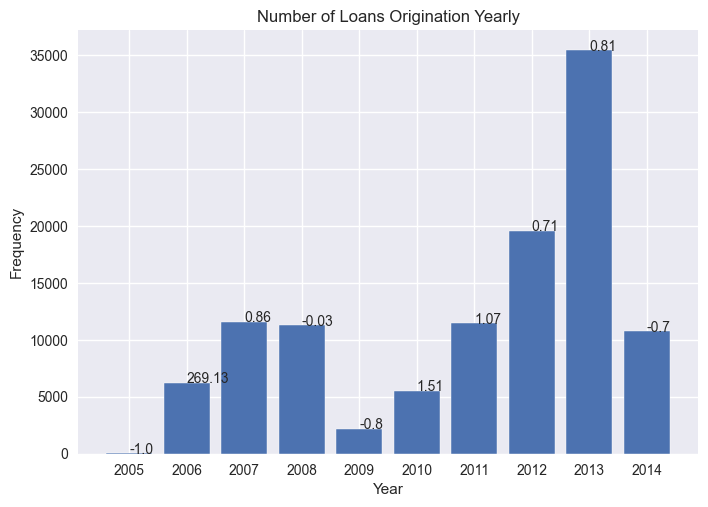

In [112]:
## Lets start with the Dates of loan Creation and their count

df_loan_copy['Year'] = df_loan_copy['Year'].astype('category')
years = pd.DataFrame(df_loan_copy['Year'].value_counts()).reset_index().sort_values('index') #creating a Dataframe

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.bar(data = years, x = 'index' , height = 'Year')

plt.title("Number of Loans Origination Yearly") #title
plt.xlabel('Year') #label
plt.ylabel("Frequency")

plt.xticks(np.arange(2005, 2015 , 1))

for i in range(10):
    ax.text(years['index'].iloc[i],years['Year'].iloc[i], 
            str(
                round((years['Year'].iloc[i]/
                       years['Year'].iloc[i-1])-1,2))) #ploting the percentage increase 
            
# for i in range(10):
#     plt.text(years['index'].iloc[i],years['Year'].iloc[i], 
#             str(format_number1(years['Year'].iloc[i],1)))

years.T

> The Year Over Year Growth was Calcualted usin the Formula [(Current_Value / Prior Value) - 1]. The Prior Year also has to show growth making 2 consequtive year of growth

> From the chart above the higest Year over Year Growth was from 2012 to 2013 with an percentage increse 81% in newly approved loans 

> The number of loan application has steady been increasing over th years with 2013 having the highest number of newly registered users on the platform with 2013 having an overwhelming surge in numerbers



next it is worth taking a better look 

>Investigating Further, What is the Amount issued in Loans for the year 2013, what was its impact on quarterly revenue

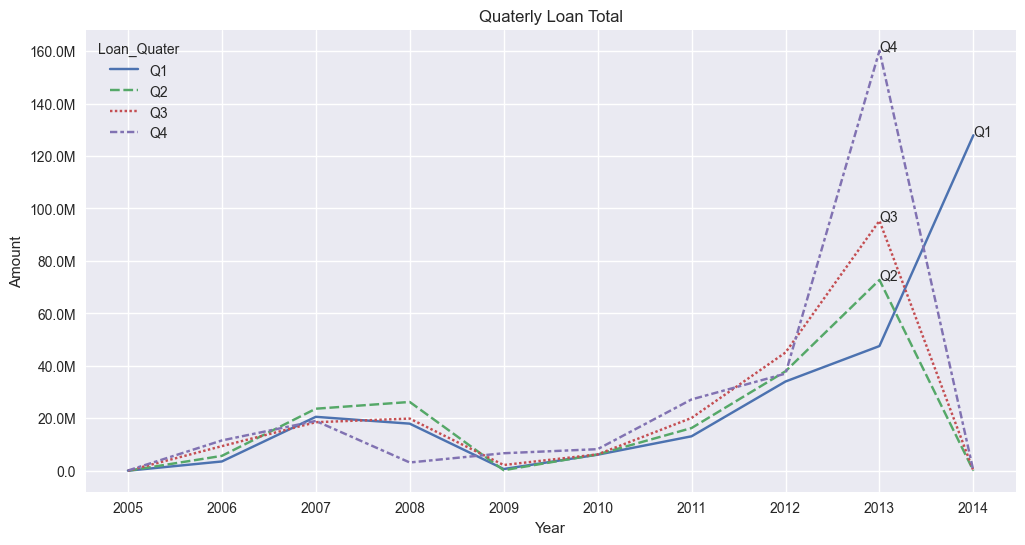

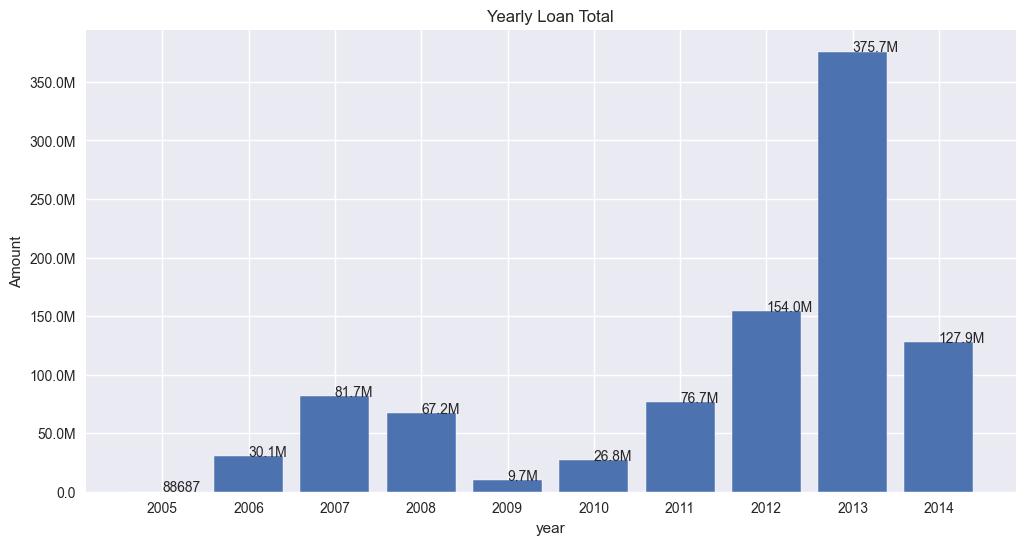

In [113]:
#creatin a Groupby object
Q_vars = ['Q1','Q2','Q3','Q4']
Y_vars = [2014,2013,2013,2013]
qr= df_loan_copy.groupby(['Loan_Quater','Year'])

#creating a Dataframe 
df_quarter = qr.LoanOriginalAmount.sum().unstack()

#ploting the first chart
fig, ax =  plt.subplots(figsize=[12,6])
sns.set_style('darkgrid')   #setting Style
sns.lineplot(df_quarter.T,ax=ax) 
plt.ylabel('Amount')
plt.title('Quaterly Loan Total')
plt.xticks(np.arange(2005, 2015 , 1))
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(format_number1));

for i,j,k in zip(Y_vars,df_quarter.T.max(), Q_vars):
    plt.text(i,j,k)

#Plotting the second chart

fig, ax1 =  plt.subplots(figsize=[12,6])
ax1.bar(x=list(df_quarter.T.index), height= list(df_quarter.sum()))
plt.xticks(np.arange(2005, 2015 , 1))
ax1.yaxis.set_major_formatter(
    plt.FuncFormatter(format_number1));
plt.title('Yearly Loan Total')
plt.xlabel ('year')
plt.ylabel('Amount')
for i,j in zip(np.arange(2005, 2015 , 1),list(df_quarter.sum())): #add text
    ax1.text(i,j,format_number1(j,1))

> 2013 has the higest YoY growth with 81%, which is an increase in total loan amount 154millon in 2012 to 375 millon in 2013

>From the first Chart, `Loan Quarter` shows the fourth quarter having the highest number of new loans approval and 2013 being the most significant year, with 160 million worth of loans given in the fourth_quater alone and the least being the first quarter with only 40 million allocated in loans, 

> The first Quarter of 2014 shows imposing figures, but we need more data to conclude the total amount of loans that the prosper loan company will give to borrowers, 




Now i would analyze the income columns

>What is the average `StatedMonthlyIncome`,`LoanOriginalAmount` and `ProsperPrincipalBorrowed` for borrowers from the prosper loan company

[10, 100, 1000, 10000, 100000]
[1000, 5000, 10000, 20000, 40000]
[1000, 5000, 20000, 40000, 80000]


,StatedMonthlyIncome,LoanOriginalAmount,ProsperPrincipalBorrowed
count,1.139370e+05,113937.00000,22085.000000
mean,5.608026e+03,8337.01385,8472.311961
std,7.478497e+03,6245.80058,7395.507650
min,0.000000e+00,1000.00000,0.000000
25%,3.200333e+03,4000.00000,3500.000000
50%,4.666667e+03,6500.00000,6000.000000
75%,6.825000e+03,12000.00000,11000.000000
max,1.750003e+06,35000.00000,72499.000000


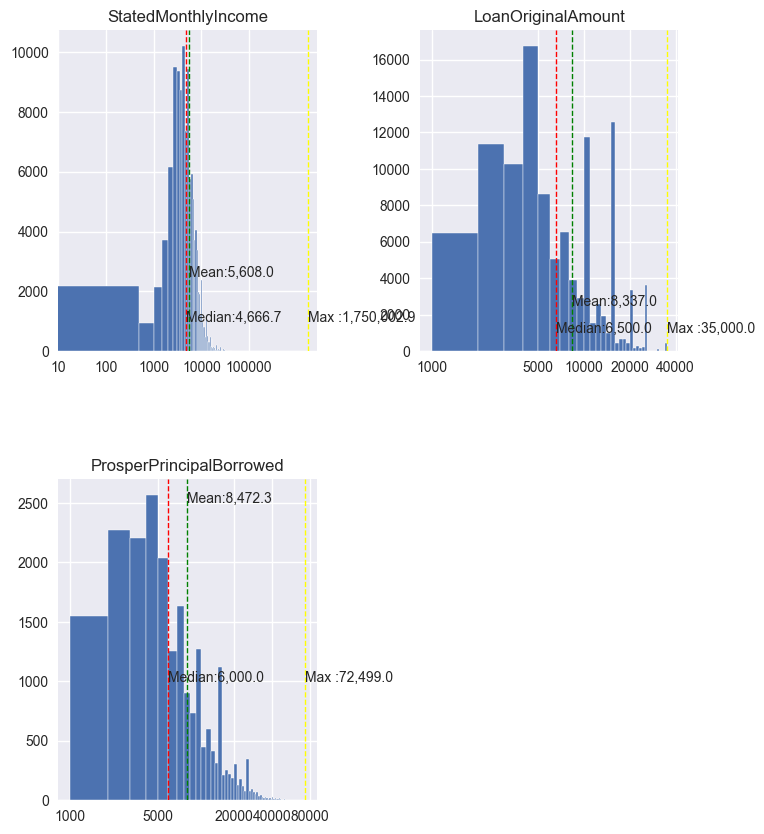

In [114]:
display_charts2( col_names = ['StatedMonthlyIncome','LoanOriginalAmount','ProsperPrincipalBorrowed'],
               binsize =[500,1000,1000,100],
               sns_style = 'darkgrid',
               median_position = 1000,
               mean_position = 2500,
               max_position = 1000,
               ticks = [[10,100,1000,10_000,100_000],
[1000,5000,10_000,20_000,40_000],
[1000,5000,20_000,40_000,80_000],
],
               scale = True )

df_loan_copy[['StatedMonthlyIncome','LoanOriginalAmount','ProsperPrincipalBorrowed']].describe()

> - `LoanOrginalAmount` the distribution has a right tail, unimodal with a median value of \\$6,500 and a maximum value of \\$35,000. Proper loan company gave loans usually averaging \\$6,500 and a maximum amount of\\$35,000 to customers. 

>- `Stated MontlyIncome`: Borrowers' monthly income range from 10 to \\$1,750,000 per month. This variable shows a normal distribution with a mediam amount of \\$4,666.7, 

>- `ProsperPricipalorrowed`: This chart shows the total price borrowed from the proper company. It shows a long-tailed distribution indicating the reduction of loans borrowed as the amount increases. The distribution is unimodal, with the majority of loans borrowed being below \\$20,000 and an average amount of \\$8,472, with the maximum amount borrowed being \\$72,499
I will investigate further its impact on prosper_Rating





### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?



> `LP_CustomerPayments`, `MonthlyLoanPayment` and `LP_GrossPrincipalLoss` the variables had a wide range of values, i used log Transformation on teach of these variales, under the Transformation the Data looked unimodal with majority of the values withint the range of 10 - 100 

>`LP_CustomerPayments`, `MonthlyLoanPayment` and `LP_GrossPrincipalLoss`showed strong similarity an indication that the variable are correlated

>When performing borrowers income the distribution is  always skewed right as in frequency on higher loans drops this trend is also shown by `StatedMonthlyIncome` , `OriginalLoanAmount` , `MonthlyLoanPayment`

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)

>When investigating the  `Prosper_Rating` a number of points outside the scope of the allowed `ProsperScore` were identified, these points can be attributed to data entry error for safety all these points were removed for safety 

> `Year` showed a consistent incresse of loan giving over the 8 year period and a significant icrease in loan Amount from 2012 - 2013 and this trend also continued into the first quarter of 2014

# Bivierate Analysis

Is there an existing relationship between the variables i choose for this analysis

<AxesSubplot: >

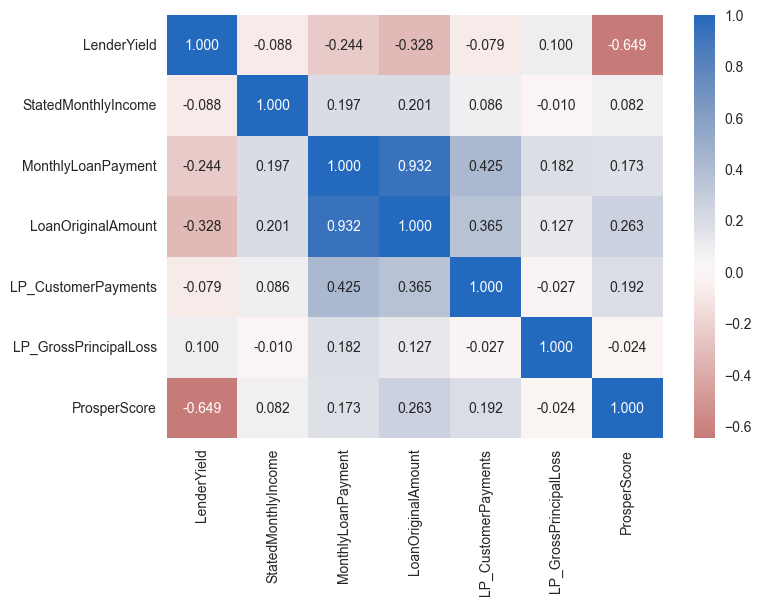

In [115]:

sns.heatmap(data = df_loan_copy[['LenderYield','StatedMonthlyIncome','MonthlyLoanPayment','LoanOriginalAmount','LP_CustomerPayments','LP_GrossPrincipalLoss','ProsperScore']].corr(),annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

> Interestingly, there is little correlation between `LP_GrossPrincipalLoss` and  `MonthlyLoanPayments.` There is a Strong correlation between `LoanOriginalAmount` and `MonthlyLoanPayment` since the larger the Amount borrowed, the higher the `MonthlyLoanPayment.`
 
> Interestingly, `LenderYeild`  has a strong, and weak and very weak negative correlation with `ProsperScore`, `LoanOrignalAmount,` and `MonthlyLoanPayment` respectively, indicating their increase will reduce the overall `LenderYeild` for the borrower
 
 


I want to explore the relationship between `LenderYeild`, `MonthlyLoanPayment`, `LoanOrignalAmount` with `LP_GrossPrincipalLoss` Further

<Figure size 1000x1000 with 0 Axes>

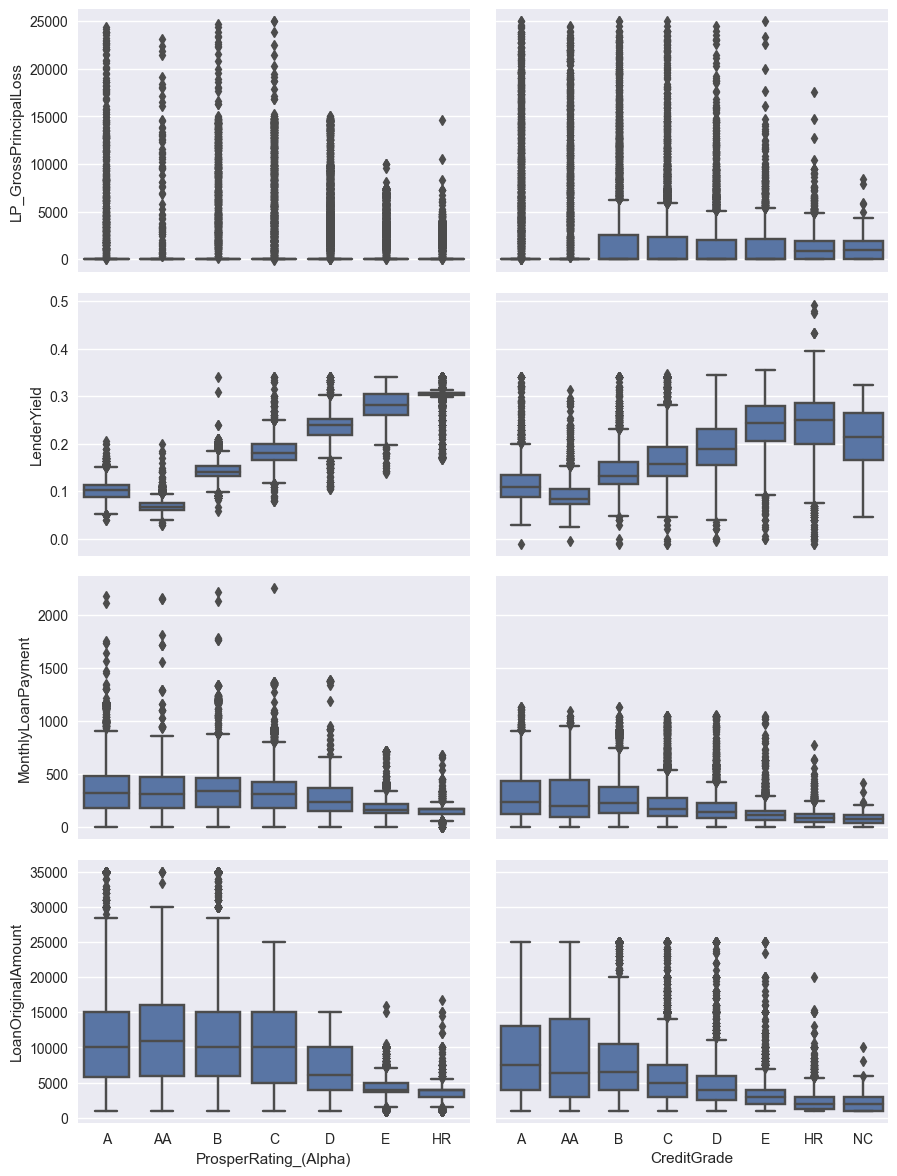

In [116]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    p = sns.boxplot(x=x, y=y, color = default_color)
    

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = df_loan_copy, y_vars = ['LP_GrossPrincipalLoss','LenderYield','MonthlyLoanPayment','LoanOriginalAmount'], x_vars =  ['ProsperRating_(Alpha)','CreditGrade'],
                height = 3, aspect = 1.5)

g.map(boxgrid)
plt.show();



 There is an interesting relationship between both rating systems; the `ProsperRating_(Alpha)` System shows a lower LenderYield rate across each grading system in relation to the BorrrowerAPR, while `CreditGrade System` shows an overall incease in `LendersYield` across each grade. `ProsperRating_(Alpha)` System shows a narrower margin between the upper and lower quartile. This indicates showing a reduction in deviation in loan yields and more across each loan grade consistency.
 
> Interestingly, the `CreditGrade` system shows a higher average monthly loan payment amount, and the Prosper rating system shows a lower average payment for each across each grade.
 
> The Change in the Grading system and rating system shows an overall improvement and `LendersYeild` and also a reduction in the monthly payments paid by borrowers across each grade
 
>`LP_GrossPrincipalLoss`: This is the total principal lost by the business, and the CreditGrade System shows a consistent loss for all Credit below 'AA.' ProsperRating System shows an overall decrease in `LP_GrossPrincipalLoss` across each grade
 
> `LendersYeild`: The`LendersYeild` for each group for each grading system shows no variation, but the `ProsperRating` system has more outliers, this might indicate a more narrow quartile range, 
 
 


What is the impact of the `Prosper_rating` system over the previous `CreditGrade` on these variables
  

In [117]:
grade2009 = df_loan_copy.groupby('CreditGrade') #Creating a Groupy object for CreditGrade
grade2014 = df_loan_copy.groupby('ProsperRating_(Alpha)') #Creating a Groupy object for ProsperRating_(Alpha)


In [118]:
Data2009 = pd.DataFrame(data = grade2009 [['LP_GrossPrincipalLoss','LenderYield','MonthlyLoanPayment','LoanOriginalAmount']].mean()
                        )
Data2014 = pd.DataFrame(grade2014[['LP_GrossPrincipalLoss','LenderYield','MonthlyLoanPayment','LoanOriginalAmount']].mean())

In [119]:
Data2009 = Data2009.rename(columns={'LP_GrossPrincipalLoss':'LP_GrossPrincipalLoss_2009','LenderYield':'LenderYield_2009','MonthlyLoanPayment': 'MonthlyLoanPayment_2009','LoanOriginalAmount':'LoanOriginalAmount_2009'})
Data2014=  Data2014.rename(columns={'ProsperRating_(Alpha)':'CreditGrade','LP_GrossPrincipalLoss':'LP_GrossPrincipalLoss_2014','LenderYield':'LenderYield_2014','MonthlyLoanPayment': 'MonthlyLoanPayment_2014','LoanOriginalAmount':'LoanOriginalAmount_2014'})
Data2009 = Data2009.drop('NC')
Data2009.reset_index(inplace= True)

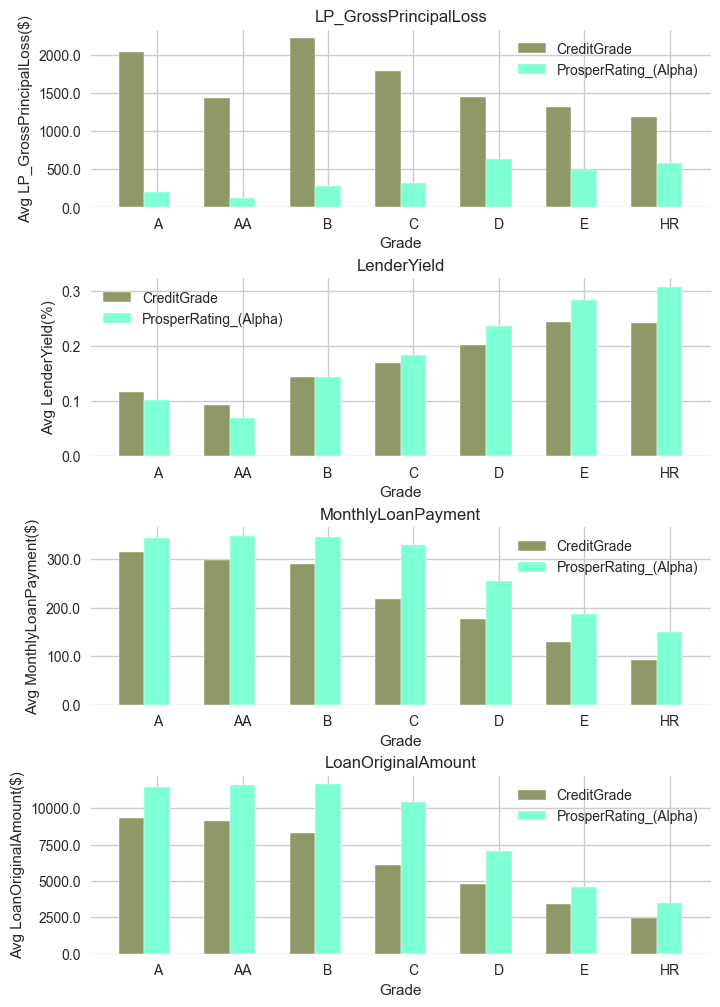

In [120]:
x_vars = ['LP_GrossPrincipalLoss_2009','LenderYield_2009','MonthlyLoanPayment_2009','LoanOriginalAmount_2009']

y_vars =   ['LP_GrossPrincipalLoss_2014','LenderYield_2014','MonthlyLoanPayment_2014','LoanOriginalAmount_2014']

y_axis = ['Avg LP_GrossPrincipalLoss($)','Avg LenderYield(%)','Avg MonthlyLoanPayment($)','Avg LoanOriginalAmount($)']

fig = plt.figure(figsize=[8,12]) #figure size
plt.subplots_adjust(hspace= 0.4)
var_len =range(len(x_vars))
dex_x = list(Data2009.CreditGrade)
x_offset = np.arange(len(dex_x)) #create an list index
width = 0.3
sns.set_style('whitegrid')

for w,x,y,z in zip(y_axis,x_vars, y_vars,var_len):
    ax=fig.add_subplot(4,1,1+z)
    

    dev_y = list(Data2009[x])   
    med_devy = list(Data2014[y])
    

    ax.bar(x_offset - width, dev_y,    width = width ,color = '#8F9967', label = x)
    ax.bar(x_offset , med_devy, width = width ,color = '#7FFFD4' ,label= y)
       

    plt.xticks(ticks = x_offset, labels = dex_x) #corrrecting the x- axis
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_number1));
    plt.tick_params(top = 'off', right = 'off')
    plt.legend(labels = ['CreditGrade','ProsperRating_(Alpha)'])
    plt.title (x[:-5])
    plt.xlabel('Grade')     # Label the 'x' axis
    plt.ylabel(w)

> This Chart was Generated by Comparing The Averages of Both Grading systems for the variable Above 

> The Chart Above shows the sum`LP_GrossPrincipalLoss` for each loan Grade over both grading systems, with the `CreditGrade` system showing from 2006 - 2009 and the `ProsperRating` system showing from 2009 - 2014 
 
>The `CreditGrade` system shows the highest `LP_GrossPrincipalLoss` of the two Grading systems, with 'B' having the maximum value of over \\$2000  and Grade 'AA' being the least with the lowest `LP_GrossPrincipalLoss` at than just below //$1500 Thousand dollars
 
>  The `ProsperRating` System introduced after 2009 shows an overall Decrease in the total`LP_GrossPrincipalLoss.`
 
> There is a Significant increase in `MonthlyLoanPayment` and `LoanOriginalAmount`, but this can be attributed to the increase in the loan being given as 50% of all loans are still active
 
> The effectiveness of the new grading system has  reduced the overall `LP_GrossPrincipalLoss` loss for the company
s
 
 


Now, let's take a second look at the price and carat distributions on the four categorical variables, `LenderYield`,`LP_GrossPrincipalLoss`,`MonthlyLoanPayment`, and `LoanOriginalAmount`

<Figure size 500x500 with 0 Axes>

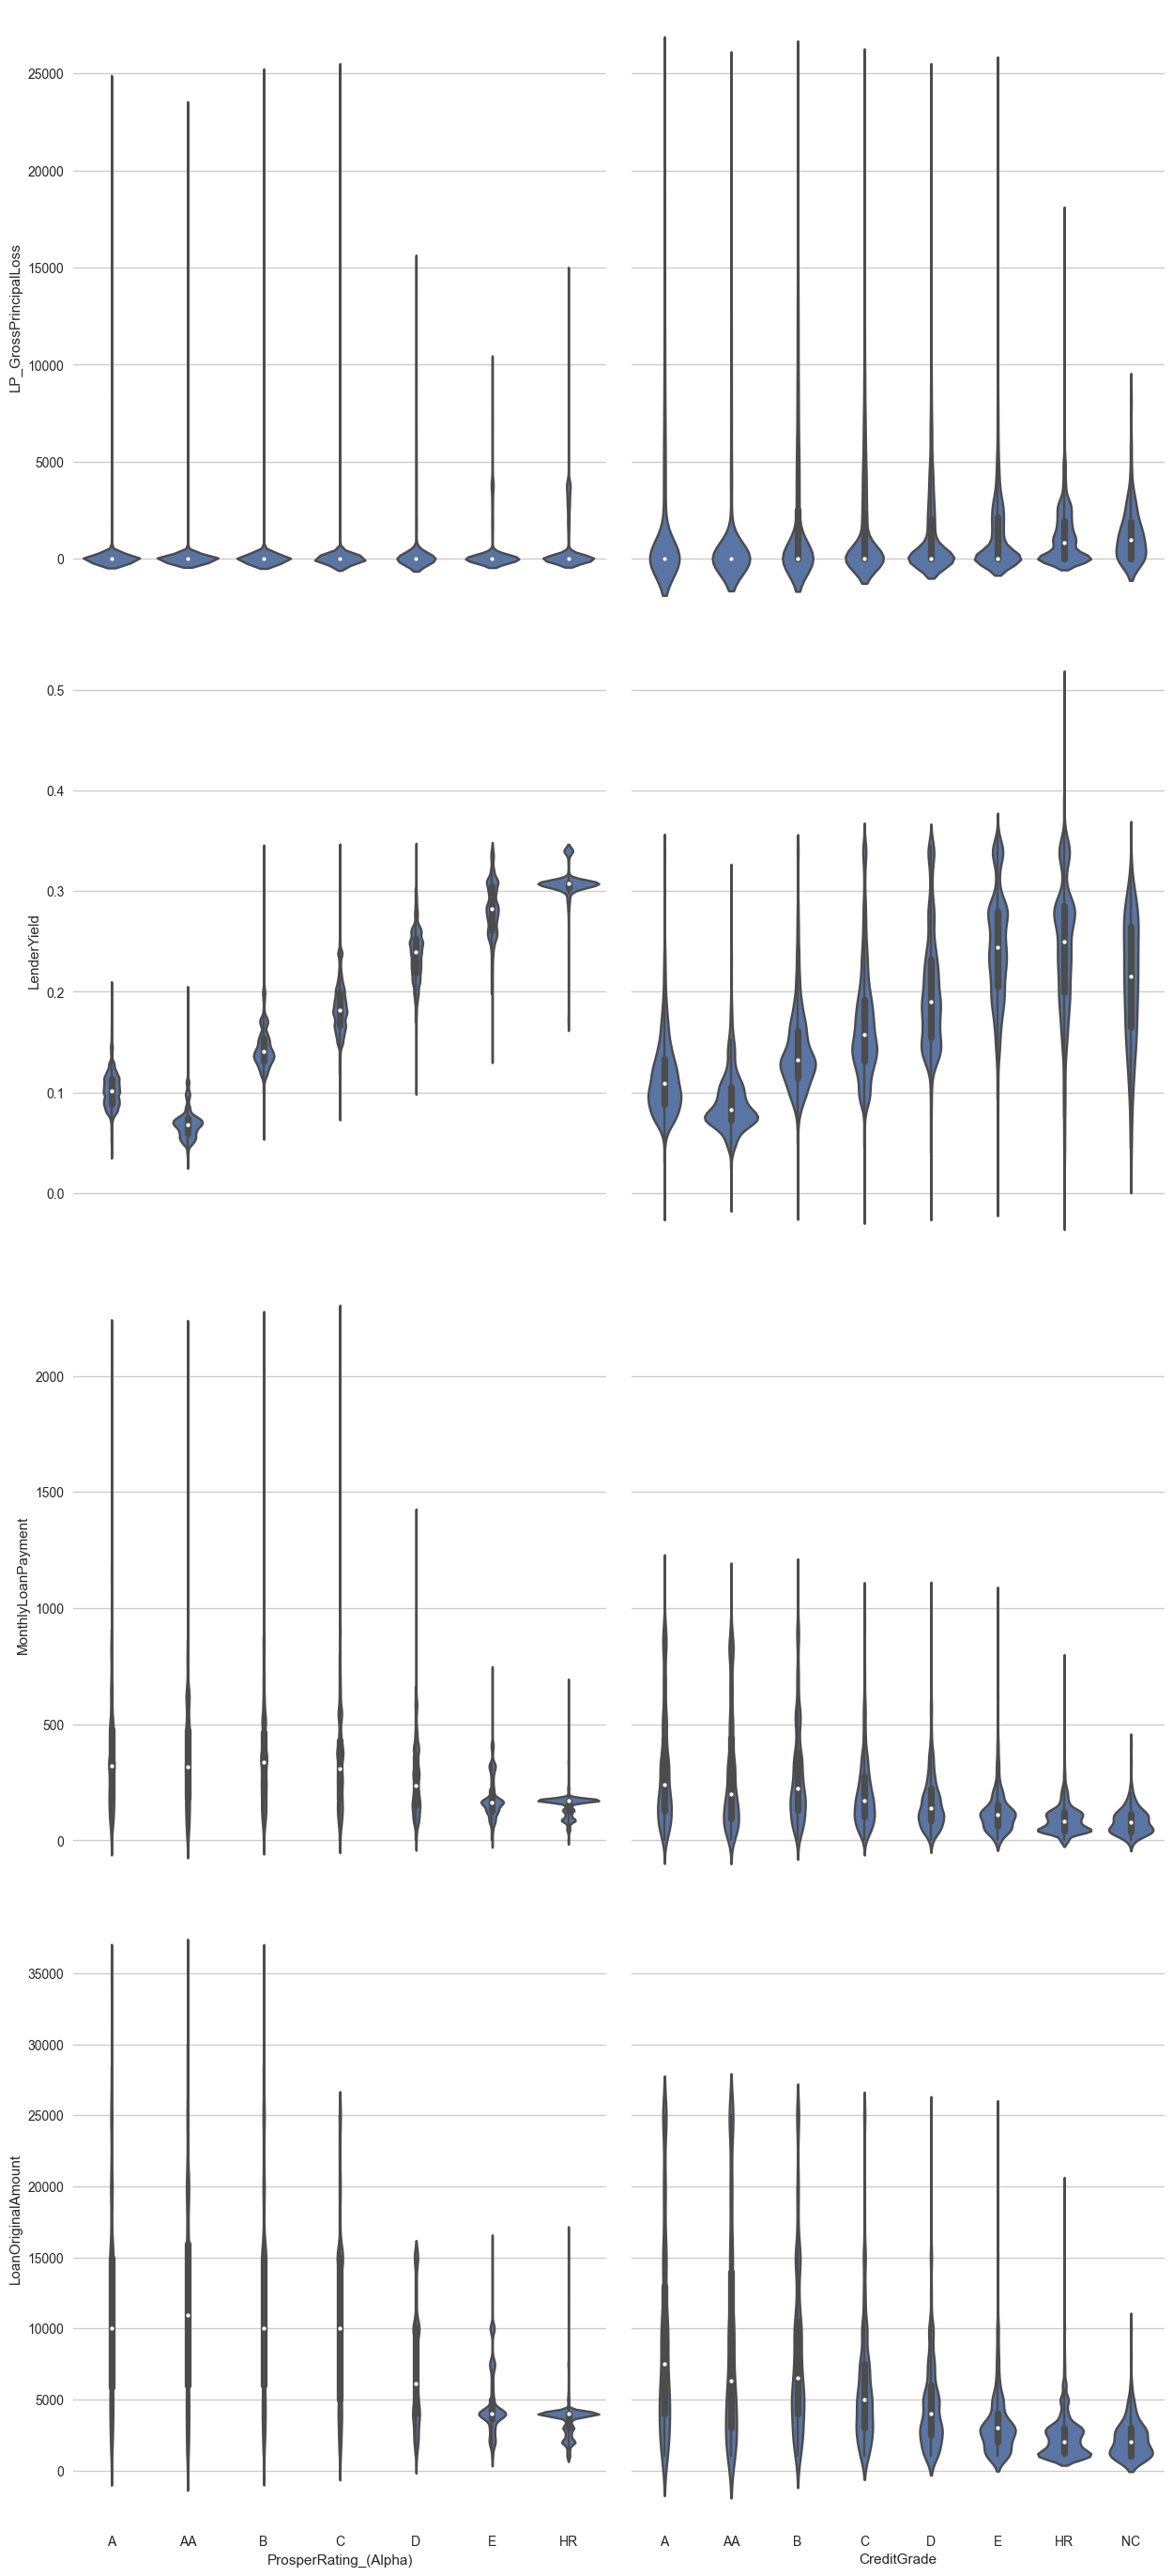

In [121]:
#creating a vilonplat function

def Violinplot(x, y, **kwargs):
    """ Quick hack for creating Violin plots plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.violinplot(x=x, y=y, color = default_color);
    

plt.figure(figsize = [5, 5])
g = sns.PairGrid(data = df_loan_copy, y_vars = ['LP_GrossPrincipalLoss','LenderYield','MonthlyLoanPayment','LoanOriginalAmount'], x_vars =  ['ProsperRating_(Alpha)','CreditGrade'],
                height = 7, aspect = 0.9)
#plt.yticks(np.arange(0,28000,1000))
g.map(Violinplot)
plt.show();

> The  `LP_GrossPrincipalLoss` Majority of principal losses for loans are for loans below the 5000 mark, but the majority of loans being given are below the 5000 points.
 
> The difference between the `Proper_Rating` and `CreditGrade systems` for `LP_GrossPrincipalLoss` is the reduction in the quartile range of loan principal loss; the `prosper_Rating` System has a lower upper quartile range across all Grades
 
> The `LP_GrossPrincipalLoss` Shows more outliers, I would like to investigate the impact of the outliers on the `LP_GrossPrincipalLoss` for the  `Proper_Rating` system
 
> `CreditGrade` shows a reduced and narrow margin for `LoanOriginalAmount` and `MonthlyLoanPayment.`
`
 


What is the impact of these changes in Borrowers' Default and Chargeoff Rate on Loans for each Grading system


<Figure size 800x550 with 0 Axes>

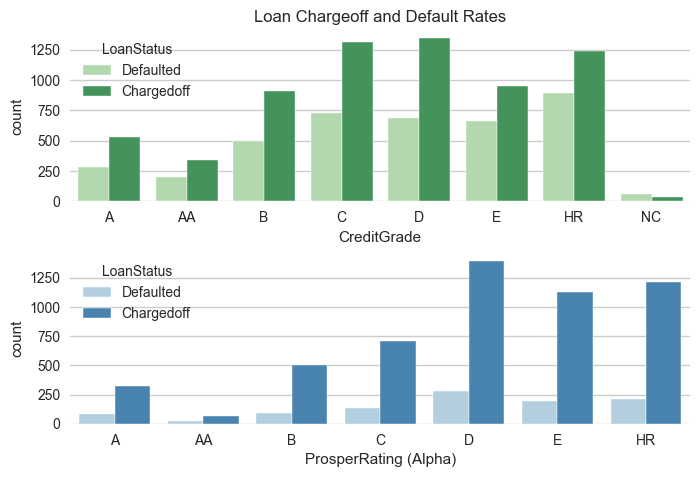

In [122]:
# Creating a copy of the loan DataSet
df_status = df_loan.copy()
plt.subplots_adjust(hspace= 5)


#creating a filter
a = df_status['LoanStatus'].isin(['Current', 'Completed','Defaulted','Cancelled','Chargedoff','FinalPaymentInProgress'])
a =df_status[~a].index  
df_status['LoanStatus'].iloc[a] = 'Past_Due'

df_status['ProsperRating (Alpha)'] = df_status['ProsperRating (Alpha)'].astype('category')
df_status['CreditGrade'] = df_status['CreditGrade'].astype('category')


#spliting the LoanStatus column into different Frames for easy analysis 
df_status1 = df_status.copy()
a = df_status1['LoanStatus'].isin(['FinalPaymentInProgress', 'Cancelled','Past_Due','Current', 
                                   'Completed','Cancelled','FinalPaymentInProgress'])
a = df_status1[~a].index
df_status1 = df_status1.iloc[a]

plt.figure(figsize = [8, 8]);
plt.subplots_adjust(hspace= 0.3);

sns.set_style('whitegrid');

# subplot 1: cpltor vs cut
plt.subplot(3, 1, 1);
sns.countplot(data = df_status1, x = 'CreditGrade', hue = 'LoanStatus', palette = 'Greens');
#plt.legend(bbox_to_anchor = (1.1, 0.8));
plt.title('Loan Chargeoff and Default Rates')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2);
sns.countplot(data = df_status1, x = 'ProsperRating (Alpha)', hue = 'LoanStatus', palette = 'Blues');
#plt.legend(bbox_to_anchor = (1.1, 0.8));
# plt.yticks(np.arange(0,13000,1000));
#plt.title('ProsperRating_(Alpha)')



 >The `CreditGarde` system had a higher Default and chargededoff rate, with 'HR' Having the highest Chargedoff rate, the Prosper_Rating system reduces the number of charged off and default rate `Prosper_Rating` has one fewer cateogries, The Difference  between each system is greater for higher credit Grade (A), (AA),(B), and (C) for lower grade the Difference in Default and Chargeoff rate is less significant
 
> `Proper_Rating` System shows reduced DeFault and charged off rates for each credit Grade
 


Next The proper_Rating system showing significant improvements, i want to investigate furter  into the distribution of the `Prosper_Rating` with the `ProsperScore`

In [123]:
def hist2d(data,xbins, ybins, x_vars, y_vars, title, ticks ,xticks, yticks, ylabel):
    
    ''' A Function to dispay 2d histplot'''

    bins_x = np.arange(0,data[x_vars].max()+xbins,xbins) # Setting the bin size
    bins_y = np.arange(0, data[y_vars].max()+ybins,ybins) # Setting the bin size
    h2d = plt.hist2d(data= data, x= x_vars, y= y_vars ,cmap='viridis_r', cmin=0.5,
                      bins = [bins_x, bins_y]);
    plt.colorbar()
    plt.xlabel(x_vars); #label
    plt.ylabel(ylabel);
    
    if ticks == True:
        plt.yticks(yticks)
        plt.xticks(xticks)
    else: pass
    

    counts = h2d[0]

    for i in range(counts.shape[0]):
        for j in range(counts.shape[1]):
            c = counts[i,j]
            if c >= 100: # increase visibility on darker cells
                plt.text(bins_x[i]+xbins/2, bins_y[j]+ybins/2, int(c),
                         ha = 'center', va = 'center', color = 'white')
            elif c > 0:
                plt.text(bins_x[i]+xbins/2, bins_y[j]+ybins/2, int(c),
                         ha = 'center', va = 'center', color = 'black')

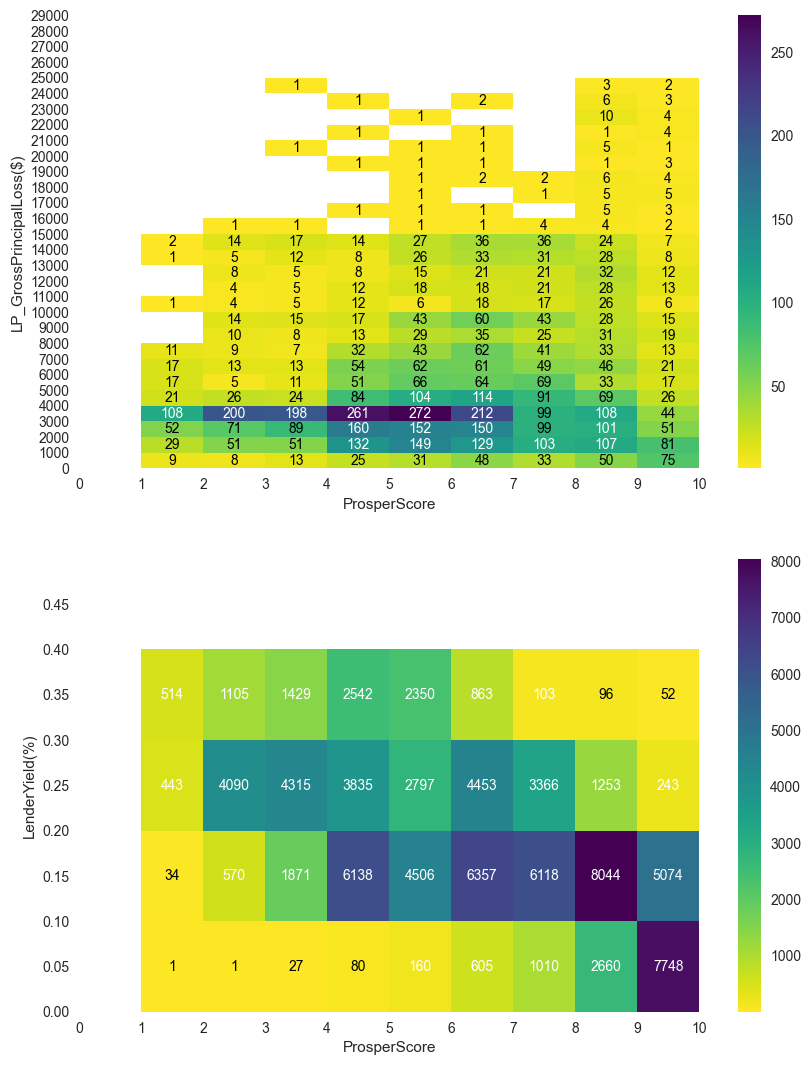

In [124]:
first_value = df_loan_copy["LP_GrossPrincipalLoss"] > 100
data = df_loan_copy[first_value]


plt.figure(figsize = [10, 20])
plt.subplot(3,1,1)
hist2d(data= data, xbins=1, ybins=1000,x_vars='ProsperScore',
       y_vars= 'LP_GrossPrincipalLoss', title= 'LP_GrossPrincipalLoss',ticks= True, 
       xticks= np.arange(0,11,1), yticks=np.arange(0,30000,1000), ylabel= 'LP_GrossPrincipalLoss($)')

plt.subplot(3,1,2)
hist2d(data= df_loan_copy, xbins=1, ybins=0.1,x_vars='ProsperScore',
       y_vars= 'LenderYield', title= 'LenderYield',ticks= True, 
       xticks= np.arange(0,11,1), yticks= np.arange(0,0.5,0.05),ylabel= 'LenderYield(%)')

# plt.subplot(3,1,3)
# hist2d(data= data1, xbins=1, ybins=10000,x_vars='ProsperScore',
#        y_vars= 'AmountDelinquent', title= 'LP_GrossPrincipalLoss',ticks= True, 
#        xticks= np.arange(0,11,1), yticks=np.arange(0,200_000,10000))

> Interestingly for prosper loans of  \\$4000 for groups 4,5 and 6 show a higher rate of default and chargeoff,
`LP_GrossPrincipalLoss`  are higer for prosper group 4,5 and 6, for the `LenderYield` group 4,5 show the highest concentration with moderate yield, but group 9 has the highest concentration of loans at a yield of 0.15 (15%).
 
> The higher the `ProsperScore,` the lower the risk, and group 9 also shows a lower `LP_GrossPrincipalLoss`  at the \\$4000 point
 
> There is a progressive increase in the number of loans from lower `ProsperScore` to Higer Score as the score increase the number of loans given to each group also increase. But for higer yeilds the reverse is observed with higher `ProsperScore` getting lower rates for `LenderYield.` 
 
 


> There is a significant reduction in Default and charge of rate when after the change of the `Rating_systems` with the `Prosper_Rating` there is also a decrease in `LP_GrossPrincipalLoss`, 

> A reduction in the variation between each grade for the `MonthlyLoanPayment`the `Prosper_Rating` System shows signiificant improvements in the reduction of Chargedoff and Deliquent loans 

> A Possible Reason for this, is the BorrowAPR with Higer ProsperScore getting lower Rates for their Loans and also a reduction in Latepayment Fees 

> From Prior Investigation the with `ProsperLoan_Rating` system the range for monthly loan payment is more consistent across each Grade 

Next investigating The `BorrowAPR`

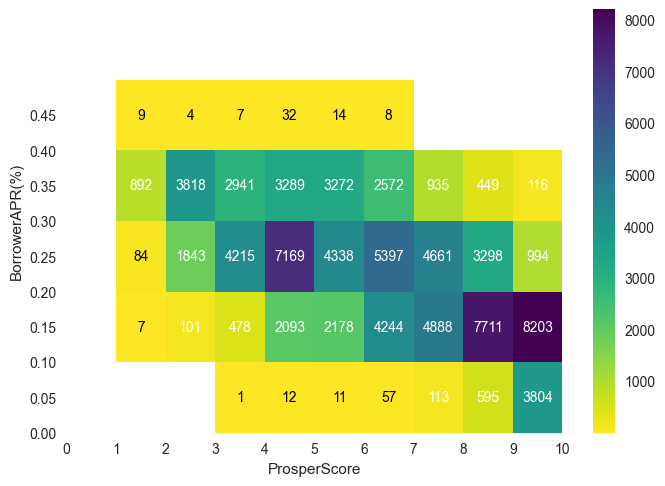

In [126]:
hist2d(data= df_loan_copy, xbins=1, ybins=0.1,x_vars='ProsperScore',
       y_vars= 'BorrowerAPR', title= 'LenderYield',ticks= True, 
       xticks= np.arange(0,11,1), yticks= np.arange(0,0.5,0.05),ylabel= 'BorrowerAPR(%)')


AS expected the Trend is also present in the `BorrowAPR` with an reduction in BorrowAPR with an increase with `Prosperscore`

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
 
`LenderYeild` surprisingly increased significantly with the change of Grading system and is a good correlation with `BorrowAPR,` `LP_GrossPrincipalLoss` also showed a significant reduction when plotted across the rating system.
 
Intresting for higher Prosperscore, they get Lower APR rates which in turn produces lower yeild to the lender.
 
 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
 
Expected relationships were found in the association between the `LoanOrignalAmount`, and `LoanMonthlyPayment.` A Positive small correlation was observed between`LoanOrignalAmount`, and `LoanMonthlyPayment,` but both variables sow a negative correlation with `LenderYield,` so they won't be explored further. There was also a small interaction in the categorical Grading System. Borrowers with a high `ProsperScore` show a negative correlation with `LenderYeild,` and the reverse is observed for Borrowers with Low `ProsperSore`.
 


# Multivariate

The main thing I want to explore in this part of the analysis is the relatonship of `ProsperScore` with Default and ChargeOff rate using `LP_GrossPrincipalLoss` and `LenderYeild`

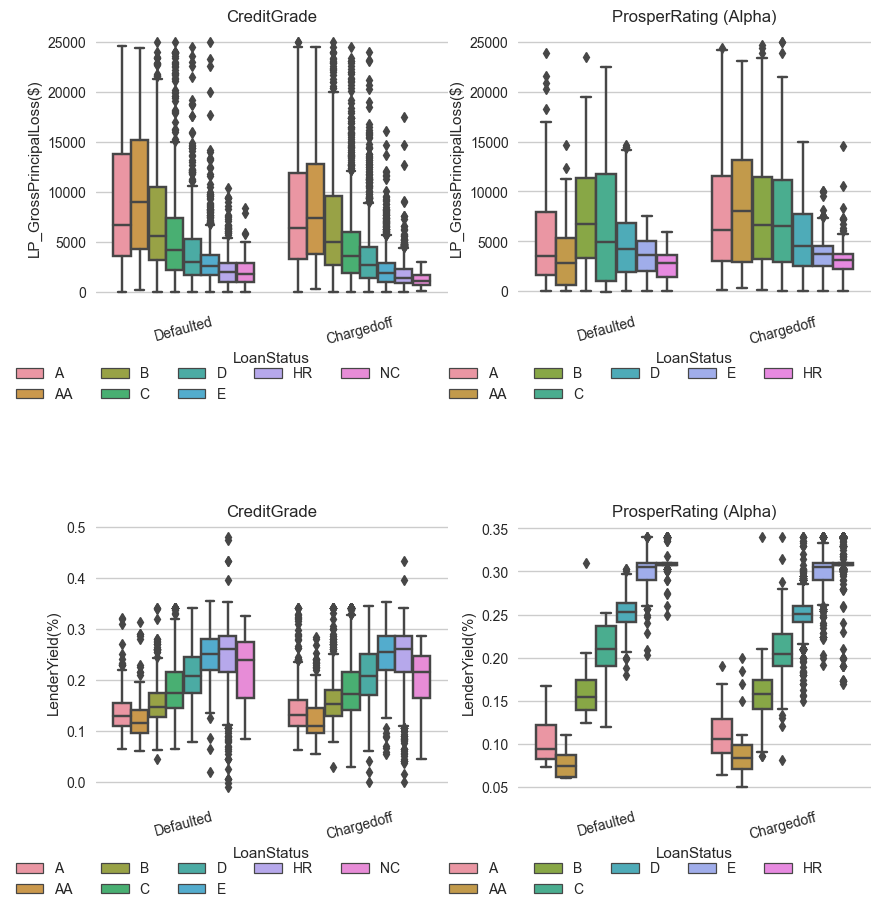

In [127]:
plt.figure(figsize = [10, 10])
plt.subplots_adjust(hspace= 0.8)

x1_vars = ['CreditGrade','ProsperRating (Alpha)','CreditGrade','ProsperRating (Alpha)']
Y1_vars = ['LP_GrossPrincipalLoss','LP_GrossPrincipalLoss','LenderYield','LenderYield']
yaxis = ['LP_GrossPrincipalLoss($)','LP_GrossPrincipalLoss($)','LenderYield(%)','LenderYield(%)']
var1_len = range(len(x1_vars))

for w,x,y,z in zip(yaxis,x1_vars,Y1_vars,var1_len):
    ax = plt.subplot(2,2,1+z)
    
    sns.set_style('whitegrid')
    sns.boxplot(data= df_status1, x='LoanStatus', y=y , hue= x )
    plt.legend(bbox_to_anchor = (0.90, -0.18), ncols = 5)
    plt.ylabel(w)

    plt.xticks(rotation = 15)
    plt.title(x)
    


> The `Prosper_Rating` Shows a more even distriution across each CreditGrade for each group within each loan status, `CreditGrade`shows a higher Default and chargedoff rate for the A and AA groups

> There a more outliers, for the `CreditGrade` System for both `LoanStatus` groups

 Next i will want to examine the `ProsperScore` futher with `LP_GrossPrincipalLoss` splitting the column into 2 parts an upper and lower with the lower ranging for losses from \$1000 - \\$10,000 and the upper from \\$10,000 - \\$30,000

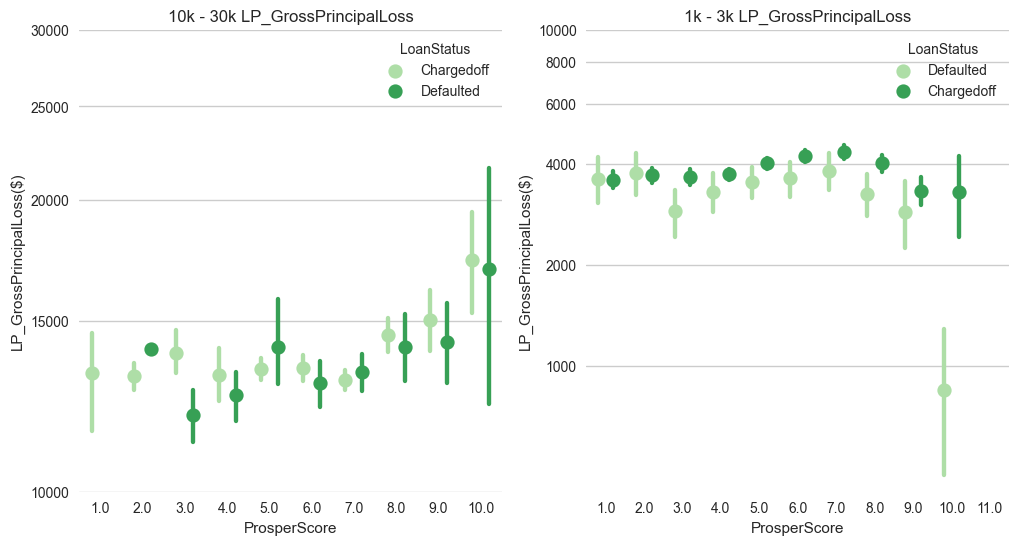

In [128]:
a = df_status1['LP_GrossPrincipalLoss'] > 10_000
data1 = df_status1[a]
data2 = df_status1[~a]
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])



sns.pointplot(data = data1, x = 'ProsperScore', y = 'LP_GrossPrincipalLoss', hue = 'LoanStatus',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_title('10k - 30k LP_GrossPrincipalLoss')
ax[0].set_ylabel('LP_GrossPrincipalLoss($)')
ax[0].set_yscale('log')
ax[0].set_yticks([10000, 15000,20000,25000,30000])
ax[0].set_yticklabels(['10000', '15000','20000','25000','30000'])
ax[0].set_yticklabels([],minor = True)

sns.pointplot(data = data2, x = 'ProsperScore', y = 'LP_GrossPrincipalLoss', hue = 'LoanStatus',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_title('1k - 3k LP_GrossPrincipalLoss')
ax[1].set_ylabel('LP_GrossPrincipalLoss($)')
ax[1].set_yscale('log')
ax[1].set_yticks([1000, 2000,4000,6000,8000,10000])
ax[1].set_yticklabels(['1000', '2000','4000','6000','8000','10000'])
ax[1].set_yticklabels([],minor = True)
plt.show();

I extended my investigation of `ProsperRating` system  against `CreditGrade`  in this section by looking at the impact of the two categorical quality features. The multivariate exploration here showed that there indeed is a positive effect of reduced loan ChargedOff and Default rates , but in the dataset, this is initially hidden by the fact that higher number of current loans were more prevalent in the years after 2010 , A reduction in the loan payment variation for each CreditGrade. Controlling for the `LP_GrossPrincipalLoss` of a loans show  the effect of the a better grading system for loans aproval


Looking back on the point plots, it doesn't seem like there's a systematic interaction effect between the categorical features. However, the features also aren't fully independent.